<a href="https://colab.research.google.com/github/KarV17/DATA-CHALLENGE/blob/main/Karime_Rangel_ColegioSagradoCorazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

**Reto**: **Bancolombia**

**Nombre:** Karime Alejandra Rangel Infante

**Institución:** Colegio Sagrado Corazón Vía Puerto Colombia

**Contexto**: Se desea clasificar adecuadamente una noticia entre positiva o negativa de acuerdo a ciertas caracteristicas con el fin de conocer defectos y virtudes de las situaciones presentes.



**Presentación de datos:** 1055 noticias con factores distintos para ser comparadas y categorizadas en sentimiento negativo (-1) y positivo (1)

**Análisis Exploratorio de las noticias** incluyendo graficos y pruebas análiticas(Normalidad de longitud de noticias, diferencia de longitud entre cada sentimiento, correlacion entre la longitud de la noticia y el sentimiento)

**Modelos a implementar (Fundamento matemático):** Modelo KNN, Rndom Forest, SVM y Regresión logistica (propuesta)

**Resultados de los 3 Modelos con sus metricas de precisión (Ecuación de cada modelo,
accuracy, presición recall, curvas roc y f-score o f-measure)**

**Menciona los criterios para escoger el mejor modelo.**

**Mencione 3 recomendaciones para Bancolombia basadas en los resultados**

**Entrega del X e Y para la implentación del reto.**

# **Exploración de datos**

***Bibliotecas y base de datos***

In [40]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

# Descargar los recursos necesarios para el procesamiento de texto con nltk
nltk.download('punkt')

# Leer el archivo Excel y cargar los datos en un DataFrame
df = pd.read_excel("Data_Challenge_Base_De_Datos_limpio_sentimiento.xlsx")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Enumeración y orden de datos***

In [41]:
# Obtener la forma del DataFrame (número de filas y columnas)
df_shape = df.shape
print("Shape of the DataFrame:", df_shape)

Shape of the DataFrame: (1055, 12)


In [42]:
# Mostrar las primeras 738 filas del DataFrame
df_head_738 = df.head(738)
print(df_head_738)

                                search  Year  Month  Day       date  \
0             PROCTER & GAMBLE-PG-NEWS  2021      6   27 2021-06-27   
1              AMERICAN TOWER-AMT-NEWS  2021      8   25 2021-08-25   
2                       LINDE-LIN-NEWS  2021      7    8 2021-07-08   
3                       LINDE-LIN-NEWS  2021      7    2 2021-07-02   
4           META PLATFORMS A-META-NEWS  2021      7   21 2021-07-21   
..                                 ...   ...    ...  ...        ...   
733            NEXTERA ENERGY-NEE-NEWS  2022     10   14 2022-10-14   
734         META PLATFORMS A-META-NEWS  2021      9   30 2021-09-30   
735  BERKSHIRE HATHAWAY 'B'-BRK.A-NEWS  2021     11   17 2021-11-17   
736            NEXTERA ENERGY-NEE-NEWS  2022      2   23 2022-02-23   
737  BERKSHIRE HATHAWAY 'B'-BRK.A-NEWS  2022      3   21 2022-03-21   

                     media                                        description  \
0              MarketWatch  The stock outperformed some of its com

***División real de datos***

In [43]:
# Contar la frecuencia de cada valor único en la columna "feeling"
feeling_counts = df["feeling"].value_counts()
print(feeling_counts)


 1    603
-1    452
Name: feeling, dtype: int64


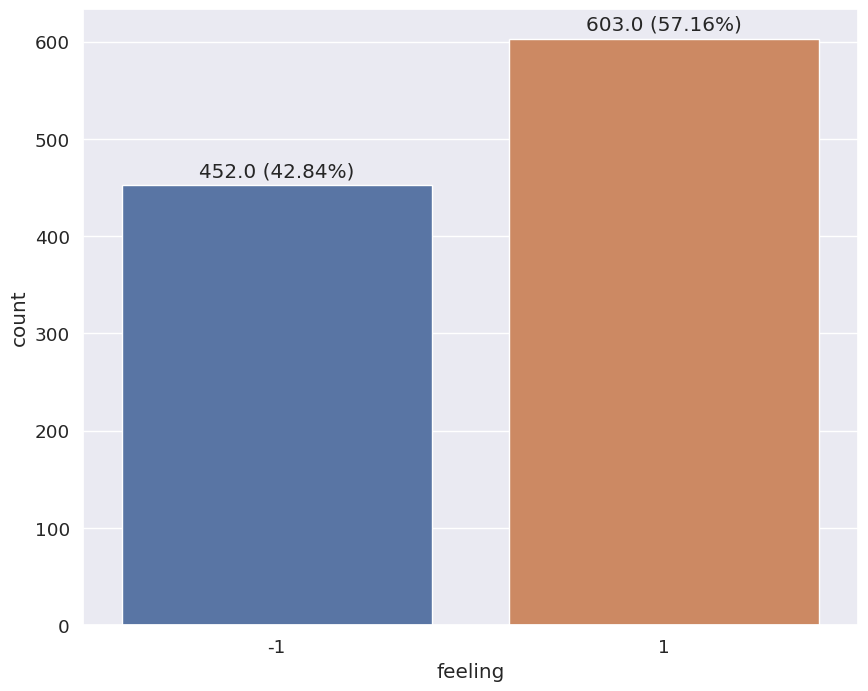

In [44]:
# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 8))

# Crear un gráfico de conteo utilizando Seaborn
ax = sns.countplot(x='feeling', data=df)

# Anotar cada barra con su frecuencia y porcentaje relativo
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


In [45]:
# Importar la biblioteca nltk para procesamiento de texto
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Descargar la lista de palabras de parada (stopwords) en inglés de nltk
nltk.download('stopwords')

# Obtener la lista de palabras de parada en inglés
english_stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Nube de palabras y frecuencia de titulos***

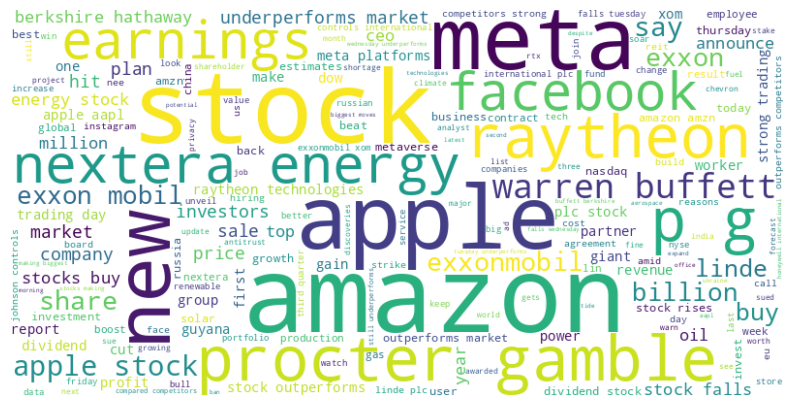

In [46]:
# Concatenar todos los títulos en un solo texto
text = ' '.join(df['title'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Unir las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_words)

# Crear un objeto WordCloud con las palabras filtradas y configurar el estilo
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Mostrar la WordCloud generada
plt.imshow(wordcloud, interpolation="bilinear")

# Configurar el eje para que no se muestren los valores
plt.axis('off')

# Mostrar la WordCloud
plt.show()


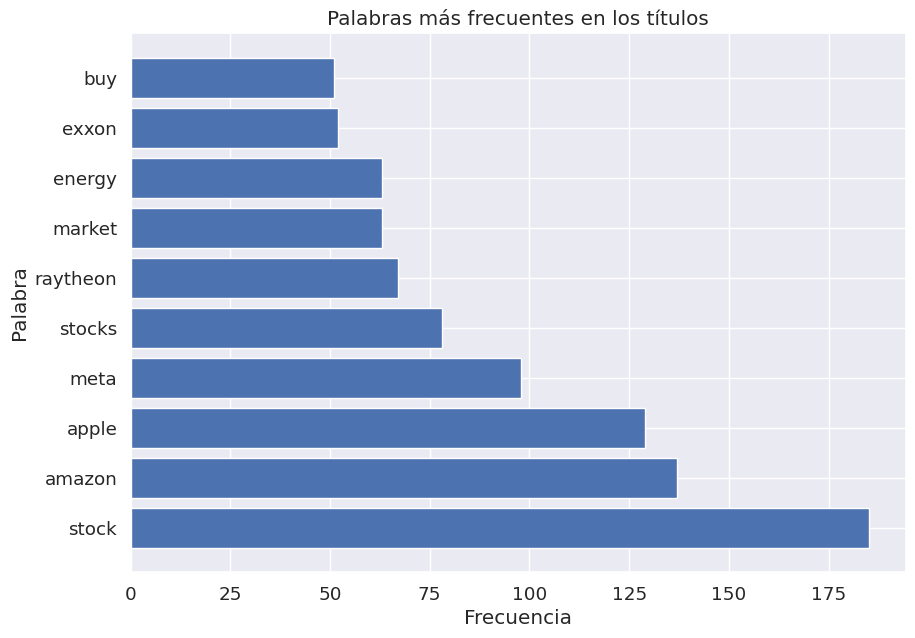

In [47]:
# Concatenar todos los títulos en un solo texto
text = ' '.join(df['title'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Contar la frecuencia de cada palabra
word_counter = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = dict(word_counter.most_common(10))

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Crear un gráfico de barras horizontales para mostrar las palabras más frecuentes
plt.barh(list(top_words.keys()), list(top_words.values()))

# Configurar el título y etiquetas del gráfico
plt.title('Palabras más frecuentes en los títulos')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.show()


***Nube de palabras y frecuencia de descripciones***

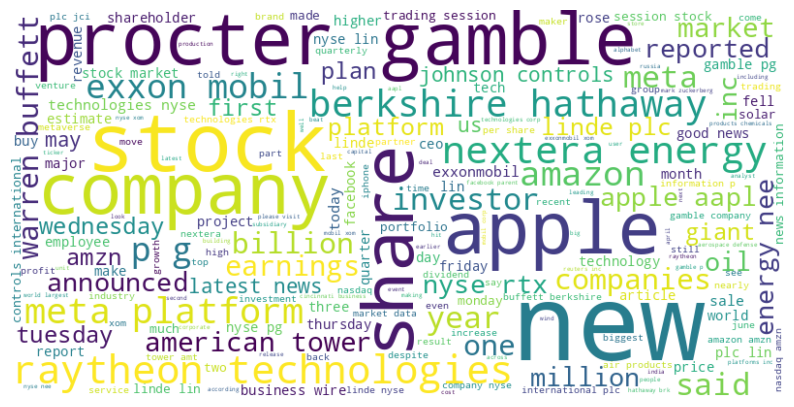

In [48]:
# Concatenar todas las descripciones en un solo texto
text = ' '.join(df['description'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Unir las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_words)

# Crear un objeto WordCloud con las palabras filtradas y configurar el estilo
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Mostrar la WordCloud generada
plt.imshow(wordcloud, interpolation="bilinear")

# Configurar el eje para que no se muestren los valores
plt.axis('off')

# Mostrar la WordCloud
plt.show()

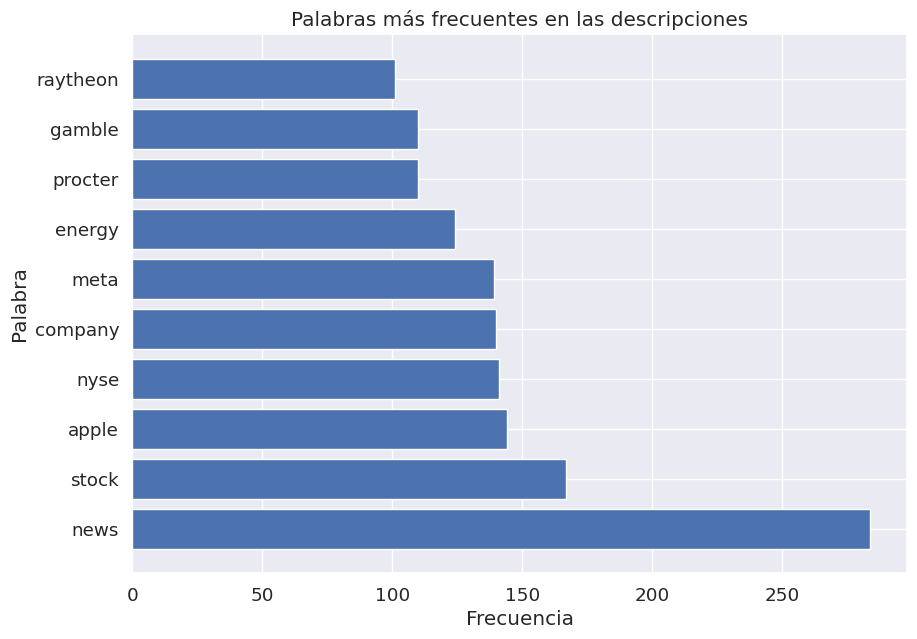

In [49]:
# Concatenar todas las descripciones en un solo texto
text = ' '.join(df['description'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Contar la frecuencia de cada palabra
word_counter = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = dict(word_counter.most_common(10))

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Crear un gráfico de barras horizontales para mostrar las palabras más frecuentes
plt.barh(list(top_words.keys()), list(top_words.values()))

# Configurar el título y etiquetas del gráfico
plt.title('Palabras más frecuentes en las descripciones')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.show()


***Nube de palabras y frecuencia de textos***

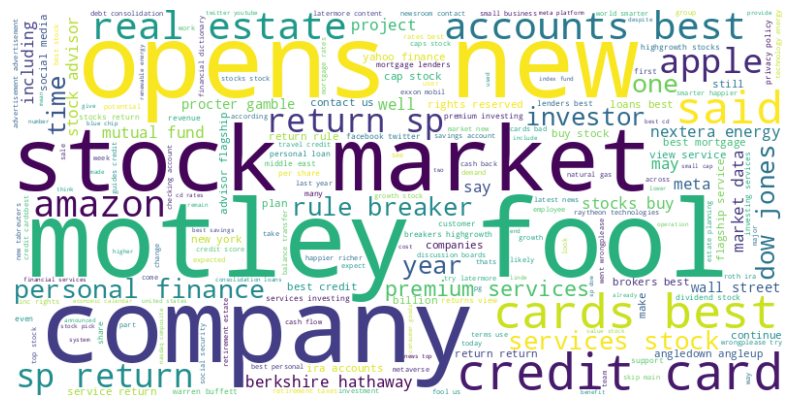

In [50]:
# Concatenar todos los textos en un solo texto
text = ' '.join(df['text'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Unir las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_words)

# Crear un objeto WordCloud con las palabras filtradas y configurar el estilo
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Mostrar la WordCloud generada
plt.imshow(wordcloud, interpolation="bilinear")

# Configurar el eje para que no se muestren los valores
plt.axis('off')

# Mostrar la WordCloud
plt.show()


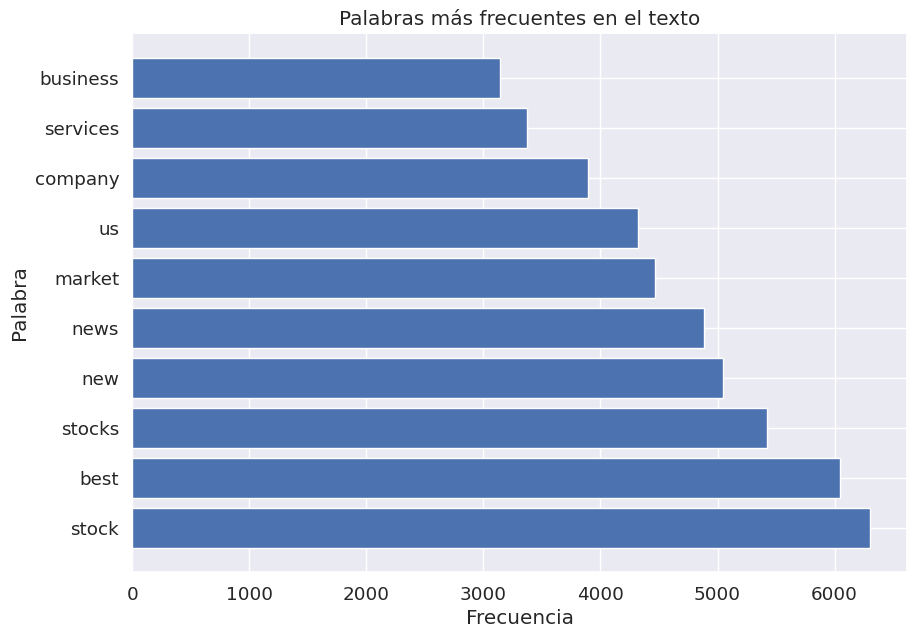

In [51]:
# Concatenar todos los textos en un solo texto
text = ' '.join(df['text'])

# Tokenizar las palabras en el texto
words = word_tokenize(text)

# Obtener la lista de palabras de parada en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las palabras: convertirlas a minúsculas, eliminar stopwords y mantener solo palabras alfabéticas
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Contar la frecuencia de cada palabra
word_counter = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = dict(word_counter.most_common(10))

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 7))

# Crear un gráfico de barras horizontales para mostrar las palabras más frecuentes
plt.barh(list(top_words.keys()), list(top_words.values()))

# Configurar el título y etiquetas del gráfico
plt.title('Palabras más frecuentes en el texto')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.show()


***Correlación entre longitud y sentimiento***

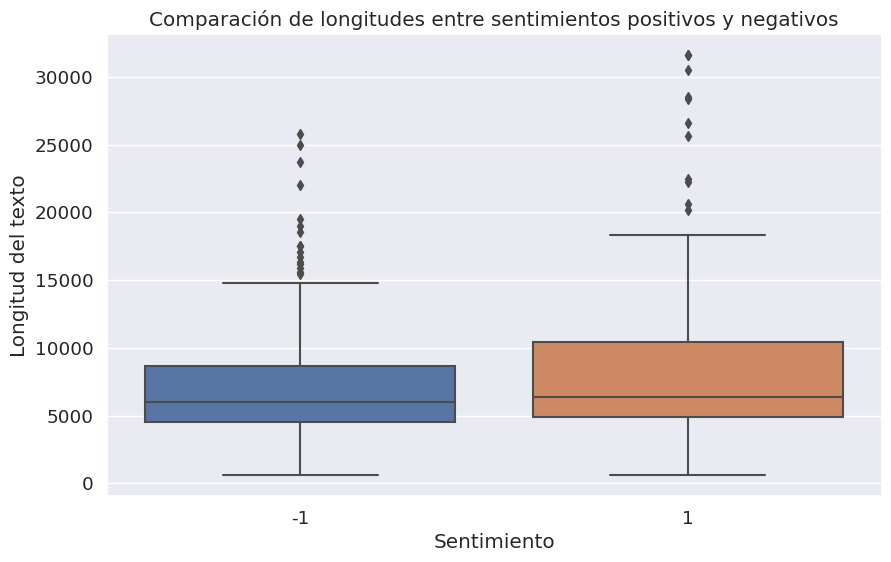

In [52]:
# Calcular la longitud de cada texto y agregar una nueva columna al DataFrame
df['text_length'] = df['text'].apply(len)

# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(10, 6))

# Crear un gráfico de caja (boxplot) para comparar las longitudes de texto entre sentimientos positivos y negativos
sns.boxplot(x='feeling', y='text_length', data=df)

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de longitudes entre sentimientos positivos y negativos')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud del texto')

# Mostrar el gráfico
plt.show()


In [53]:
# Calcular la correlación entre la longitud del texto y el sentimiento
correlation = df['text_length'].corr(df['feeling'])

# Imprimir el resultado
print(f"Correlación entre Longitud de Noticias y Sentimiento: {correlation}")


Correlación entre Longitud de Noticias y Sentimiento: 0.08715201168773645


# **División de datos**

In [54]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Definir las columnas de características y la columna objetivo
features_columns = ['search', 'media', 'description', 'title', 'text']
label_column = 'feeling'

# Dividir el conjunto de datos en entrenamiento y validación
train_data, validation_data = train_test_split(df, test_size=0.3, random_state=42)

# Obtener las características (X) y la etiqueta (y) para el conjunto de entrenamiento
X_train_raw = train_data[features_columns]
y_train = train_data[label_column]

# Obtener las características (X) y la etiqueta (y) para el conjunto de validación
X_test_raw = validation_data[features_columns]
y_test = validation_data[label_column]


In [55]:
# Importar las bibliotecas necesarias
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Agrupar los datos de entrenamiento por la etiqueta 'feeling'
grouped_data = train_data.groupby('feeling')

# Inicializar un diccionario para almacenar recuentos de palabras por etiqueta
word_counts_per_label = {}

# Iterar sobre cada grupo y contar las palabras
for label, group in grouped_data:
    # Concatenar todas las palabras de 'search', 'media', 'description', 'title' y 'text'
    all_words = ' '.join(group['search'] + ' ' + group['media'] + ' ' + group['description'] + ' ' + group['title'] + ' ' + group['text']).split()
    word_counts_per_label[label] = Counter(all_words)

# Encontrar las palabras comunes entre todas las etiquetas
common_words = set(word_counts_per_label[list(word_counts_per_label.keys())[0]].keys())
for label in word_counts_per_label:
    common_words.intersection_update(word_counts_per_label[label].keys())

# Identificar palabras sugeridas para añadir a la lista de palabras de parada basadas en un umbral de frecuencia
additional_stopwords = [word for word in common_words if word not in ENGLISH_STOP_WORDS and word_counts_per_label[label][word] > 100]  # ejemplo de umbral

# Imprimir las palabras sugeridas para añadir a la lista de palabras de parada
print("Palabras sugeridas para añadir a la lista de palabras de parada:", additional_stopwords)

# Actualizar la lista de palabras de parada con las palabras sugeridas
updated_stopwords_list = list(ENGLISH_STOP_WORDS) + additional_stopwords


Palabras sugeridas para añadir a la lista de palabras de parada: ['pg', 'time', 'global', 'low', 'source', 'breakers', 'b', 'worlds', 'auto', 'positive', 'open', 'tech', 'work', 'reports', 'help', 'newspaper', 'guidance', 'reviews', 'friday', 'higher', 'free', 'cookies', 'ago', 'options', 'generation', 'ratings', 'program', 'transfer', 'high', 'members', 'current', 'powered', 'security', 'virtual', 'environmental', 'technology', '101', 'includes', 'subscribe', 'basis', 'etfs', 'healthcare', 'overview', 'hold', 'march', 'money', 'taxes', 'apple', 'loans', 'lower', 'states', '200', 'research', 'public', '&', 'invest', 'lenders', 'need', 'blue', 'popular', 'roth', 'score', 'screener', 'consolidation', 'david', 'helium', 'product', 'appsbest', 'calls', 'helps', 'deal', 'goods', 'link', 'companies', 'increased', 'multiple', 'website', 'list', 'india', 'boost', 'additional', 'credit', 'utility', 'plans', 'media', 'production', 'crypto', '15', 'china', 'employees', 'investor', 'users', 'impor

In [56]:
# Inicializar un vectorizador TF-IDF con la lista de palabras de parada actualizada y un límite máximo de características
tfidf_vectorizer = TfidfVectorizer(stop_words=updated_stopwords_list, max_features=500)

# Combinar todas las columnas de texto en una sola para el conjunto de entrenamiento
X_train_combined_text = X_train_raw.apply(lambda x: ' '.join(x), axis=1)

# Combinar todas las columnas de texto en una sola para el conjunto de validación
X_test_combined_text = X_test_raw.apply(lambda x: ' '.join(x), axis=1)

# Aplicar el vectorizador TF-IDF al conjunto de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_combined_text)

# Aplicar el vectorizador TF-IDF al conjunto de validación utilizando el mismo vectorizador entrenado en el conjunto de entrenamiento
X_test_tfidf = tfidf_vectorizer.transform(X_test_combined_text)


# **Nubes de palabras diferenciales**

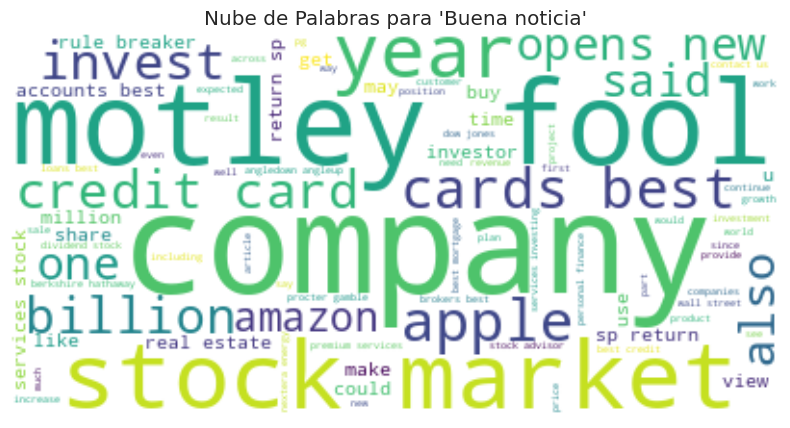

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegúrate de que X_train_raw y y_train sean tus datos de entrenamiento y etiquetas

# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_positivo = X_train_raw[y_train == 1]['text']
textos_no_positivo = X_train_raw[y_train == -1]['text']

# Unir todos los textos para cada etiqueta
texto_unido_positivo = " ".join(texto for texto in textos_positivo)
texto_unido_no_positivo = " ".join(texto for texto in textos_no_positivo)

# Crear y visualizar la nube de palabras para 'Buena noticia'
wordcloud_positivo = WordCloud(stopwords=english_stopwords, background_color="white").generate(texto_unido_positivo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Buena noticia'")
plt.show()

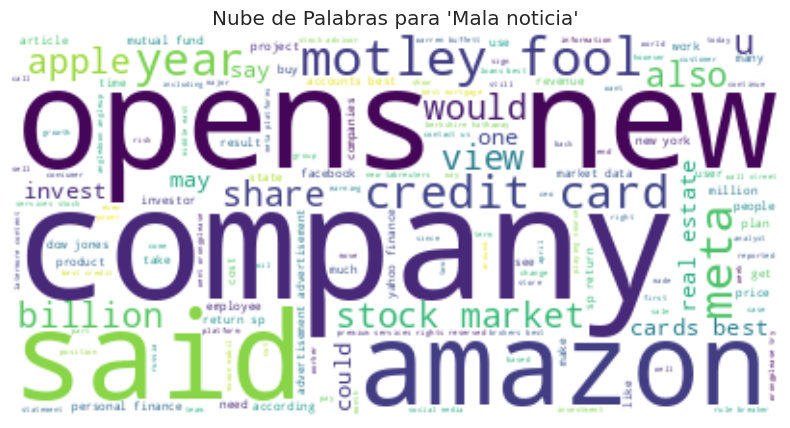

In [58]:
# Crear y visualizar la nube de palabras para 'Mala noticia'
wordcloud_no_positivo = WordCloud(stopwords=english_stopwords, background_color="white").generate(texto_unido_no_positivo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_positivo, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Mala noticia'")
plt.show()

# **Modelo KNN**


El algoritmo k-Nearest Neighbors (k-NN) se basa en la idea de clasificar nuevos puntos según la similitud con los puntos de entrenamiento. En lugar de utilizar una fórmula específica, se emplea una medida de similitud, comúnmente la distancia euclidiana, para calcular la distancia entre el nuevo punto y todos los puntos de entrenamiento. Luego, se seleccionan los k puntos más cercanos, conocidos como vecinos más cercanos. Para clasificación, la etiqueta del nuevo punto se determina por votación basada en las etiquetas de sus vecinos más cercanos, mientras que para regresión, se toma el valor medio de las salidas de los vecinos más cercanos. La elección de k, el número de vecinos, es un factor importante que afecta la sensibilidad del modelo. En resumen, k-NN clasifica puntos según su proximidad a puntos de entrenamiento, utilizando una métrica de similitud para medir la distancia entre ellos.

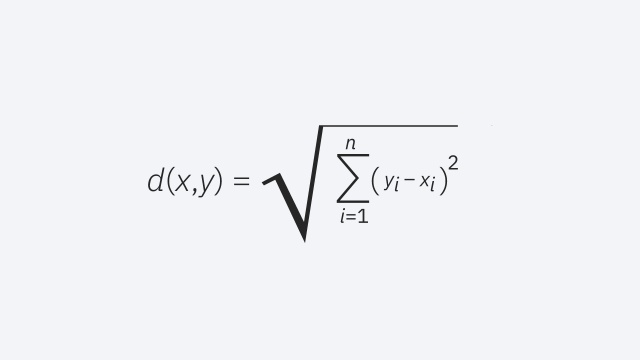

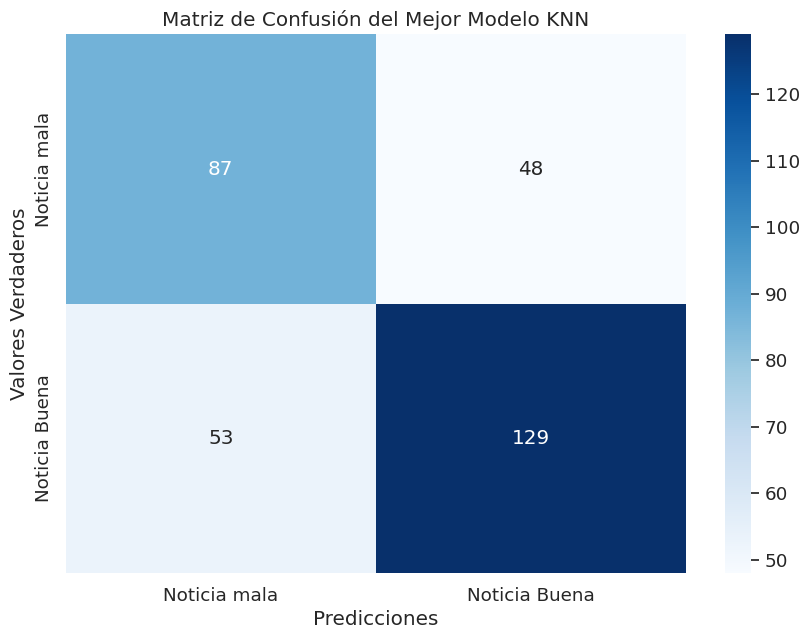

Mejores hiperparámetros: {'n_neighbors': 5}


In [59]:
# Importar bibliotecas necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Definir los parámetros a ajustar para la búsqueda de cuadrícula
parametros = {'n_neighbors': [3, 5, 7, 10]}

# Crear el modelo KNN
knn_model = KNeighborsClassifier()

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn_model, parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Obtener el mejor modelo según la búsqueda de cuadrícula
mejor_knn_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_mejor_knn = mejor_knn_model.predict(X_test_tfidf)

# Configurar el tamaño de la figura para la visualización de la matriz de confusión
plt.figure(figsize=(10, 7))

# Mostrar la matriz de confusión usando Seaborn
sns.heatmap(confusion_matrix(y_test, y_pred_mejor_knn), annot=True, fmt='g', cmap='Blues',
            xticklabels=['Noticia mala', 'Noticia Buena'],
            yticklabels=['Noticia mala', 'Noticia Buena'])

# Configurar etiquetas y título de la matriz de confusión
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión del Mejor Modelo KNN')

# Mostrar la matriz de confusión
plt.show()

# Mostrar los mejores hiperparámetros encontrados durante la búsqueda de cuadrícula
print("Mejores hiperparámetros:", grid_search.best_params_)



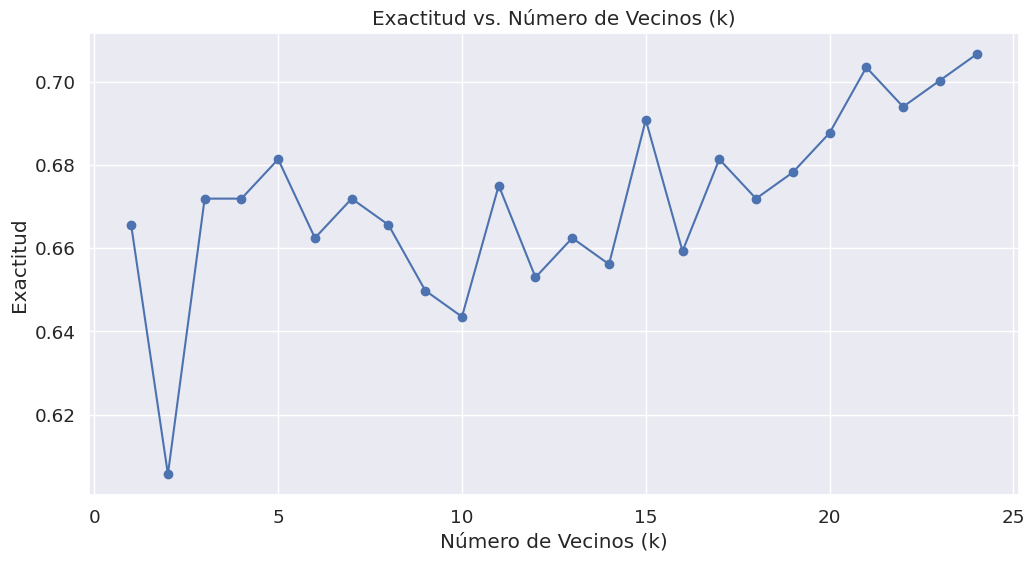

In [60]:
# Crear una lista de valores de k para probar
k_values = list(range(1, 25))

# Inicializar una lista para almacenar las exactitudes para cada valor de k
accuracies = []

# Iterar sobre los valores de k y ajustar el modelo KNN para cada valor
for k in k_values:
    # Crear y ajustar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test_tfidf)

    # Calcular la exactitud y almacenarla en la lista
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Configurar el tamaño de la figura para la visualización de la curva de aprendizaje
plt.figure(figsize=(12, 6))

# Graficar la curva de aprendizaje (Accuracy vs. Número de Vecinos)
plt.plot(k_values, accuracies, marker='o', linestyle='-')

# Configurar título y etiquetas del gráfico
plt.title("Exactitud vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")

# Agregar una cuadrícula al gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()


# **Modelo Random Forest**


Random Forest es un algoritmo de aprendizaje supervisado que se basa en árboles de decisión y utiliza un enfoque de conjunto para mejorar la precisión y la generalización del modelo. Durante el entrenamiento, se construyen múltiples árboles de decisión a través de muestreo bootstrap y selección aleatoria de características. Cada árbol realiza predicciones independientes, y en el caso de clasificación, la etiqueta final se determina por votación, mientras que en regresión, se promedian las predicciones. La combinación de modelos independientes ayuda a reducir la varianza del modelo global, mejorando su capacidad para generalizar a nuevos datos. Aunque no hay una fórmula única que describa la relación matemática entre las características, Random Forest destaca por su capacidad para manejar conjuntos de datos complejos y mejorar la robustez del modelo a través de la diversidad de los árboles de decisión.

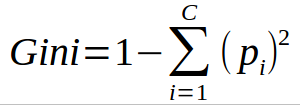

In [61]:

# Importar el clasificador RandomForest
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo RandomForest con 100 árboles y semilla aleatoria fija
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Ajustar el modelo RandomForest al conjunto de entrenamiento
rf_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_tfidf)

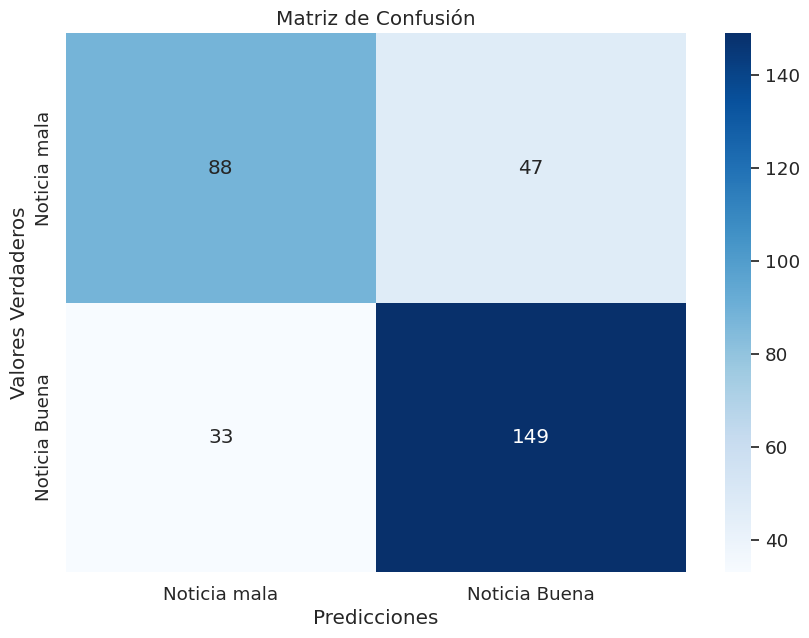

In [62]:
# Importar bibliotecas necesarias
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión usando las etiquetas verdaderas y las predicciones del modelo RandomForest
matriz_confusion = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Noticia mala', 'Noticia Buena']

# Configurar el tamaño de la figura para la visualización de la matriz de confusión
plt.figure(figsize=(10, 7))

# Crear el heatmap con Seaborn
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)

# Configurar etiquetas y título de la matriz de confusión
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()


In [63]:
# Importar la biblioteca necesaria
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de parámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 800],  # Número de árboles
    'max_depth': [10, 20]  # Profundidad máxima de los árboles
}

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=0)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores parámetros: {'max_depth': 10, 'n_estimators': 500}
Mejor score de validación cruzada (accuracy): 0.6937669376693768


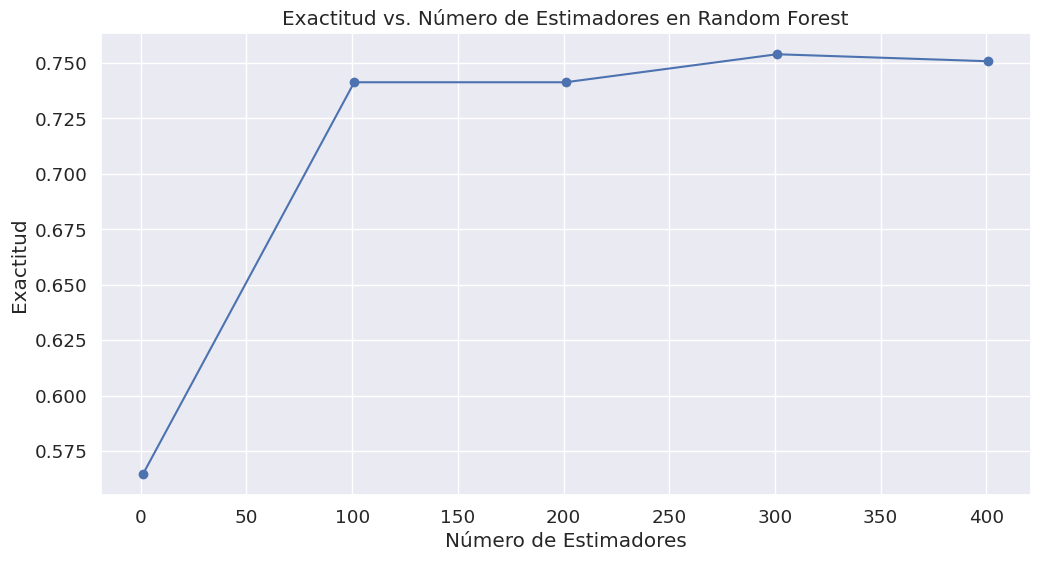

In [64]:
# Importar bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de árboles en el bosque
n_estimators_values = list(range(1, 501, 100))

# Lista para guardar las exactitudes para cada número de árboles
forest_accuracies = []

# Para cada valor de n_estimators, entrenar un modelo Random Forest y evaluar su exactitud
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train_tfidf, y_train)
    y_pred_rf = rf.predict(X_test_tfidf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    forest_accuracies.append(accuracy_rf)

# Configurar el tamaño de la figura para la visualización de la curva de aprendizaje
plt.figure(figsize=(12, 6))

# Graficar la curva de aprendizaje (Exactitud vs. Número de Estimadores)
plt.plot(n_estimators_values, forest_accuracies, marker='o', linestyle='-')

# Configurar título y etiquetas del gráfico
plt.title("Exactitud vs. Número de Estimadores en Random Forest")
plt.xlabel("Número de Estimadores")
plt.ylabel("Exactitud")

# Agregar una cuadrícula al gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()


# **Modelo SVM**

Support Vector Machine (SVM) es un algoritmo de aprendizaje supervisado que busca encontrar un hiperplano óptimo para separar clases en un espacio de características. Esto se formula como un problema cuadrático con restricciones, donde se maximiza la margen entre clases, representada por la distancia mínima de los puntos al hiperplano. Se introduce la idea de un margen suave mediante una función de pérdida hinge para manejar conjuntos de datos no lineales y permitir ciertos errores de clasificación. El kernel trick se utiliza para mapear los datos a un espacio de características de mayor dimensión, facilitando la separación en casos no lineales. El problema se puede expresar en términos de un problema dual, y la clasificación se realiza evaluando la posición de un nuevo punto en relación con el hiperplano. En resumen, SVM optimiza la separación de clases a través de técnicas de optimización cuadrática, introduciendo flexibilidad con el margen suave y adaptabilidad a conjuntos de datos complejos mediante el kernel trick.

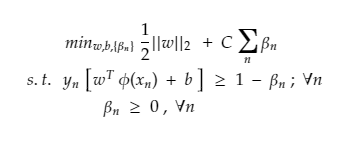

In [65]:
# Importar el clasificador SVM
from sklearn.svm import SVC

# Crear un modelo SVM con semilla aleatoria fija
svm_model = SVC(random_state=0)

# Ajustar el modelo SVM al conjunto de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_tfidf)


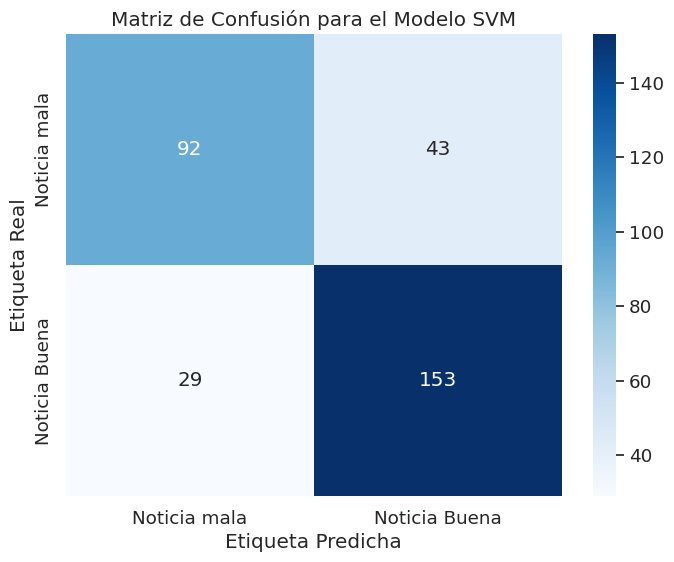

In [66]:
# Importar bibliotecas necesarias
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Etiquetas para la matriz de confusión
etiquetas = ['Noticia mala', 'Noticia Buena']

# Configurar el tamaño de la figura para la visualización de la matriz de confusión
plt.figure(figsize=(8, 6))

# Graficar la matriz de confusión con Seaborn
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)

# Configurar título y etiquetas del gráfico
plt.title('Matriz de Confusión para el Modelo SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')

# Mostrar la matriz de confusión
plt.show()


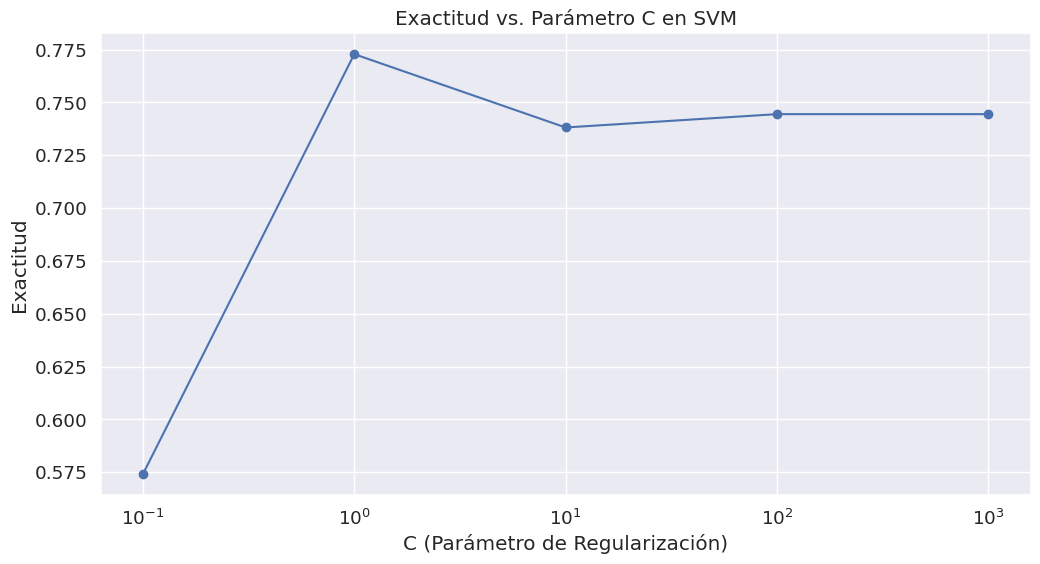

In [67]:
# Importar bibliotecas necesarias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el parámetro C
C_values = [0.1, 1, 10, 100, 1000]

# Lista para guardar las exactitudes para cada valor de C
svm_accuracies = []

# Para cada valor de C, entrenar un modelo SVM y evaluar su exactitud
for C in C_values:
    svm = SVC(C=C, random_state=0)
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_test_tfidf)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(accuracy_svm)

# Configurar el tamaño de la figura para la visualización de la curva de aprendizaje
plt.figure(figsize=(12, 6))

# Graficar la curva de aprendizaje (Exactitud vs. Parámetro C)
plt.plot(C_values, svm_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Parámetro C en SVM")
plt.xlabel("C (Parámetro de Regularización)")
plt.ylabel("Exactitud")
plt.xscale('log')  # Escala logarítmica si los valores de C varían mucho

# Agregar una cuadrícula al gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **Propuesta: Regresión logistica**

La Regresión Logística es un modelo matemático para la clasificación binaria que utiliza la función logística para modelar la probabilidad de pertenencia a una clase. La función logística transforma la combinación lineal de las variables predictoras y los parámetros del modelo en un rango entre 0 y 1. El modelo logístico se define como la probabilidad de que la variable de respuesta sea igual a 1. La estimación de parámetros se realiza mediante el método de máxima verosimilitud, que busca maximizar la probabilidad de observar los datos dados los parámetros del modelo. La clasificación se realiza mediante la comparación de la probabilidad predicha con un umbral (generalmente 0.5), donde valores por encima del umbral indican la predicción de la clase positiva y viceversa. La Regresión Logística es ampliamente utilizada debido a su interpretabilidad, simplicidad y capacidad para modelar relaciones no lineales.

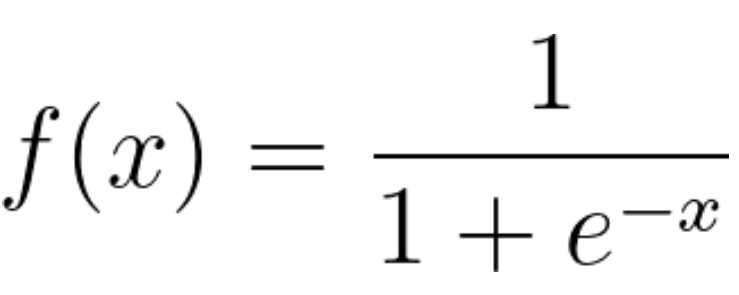

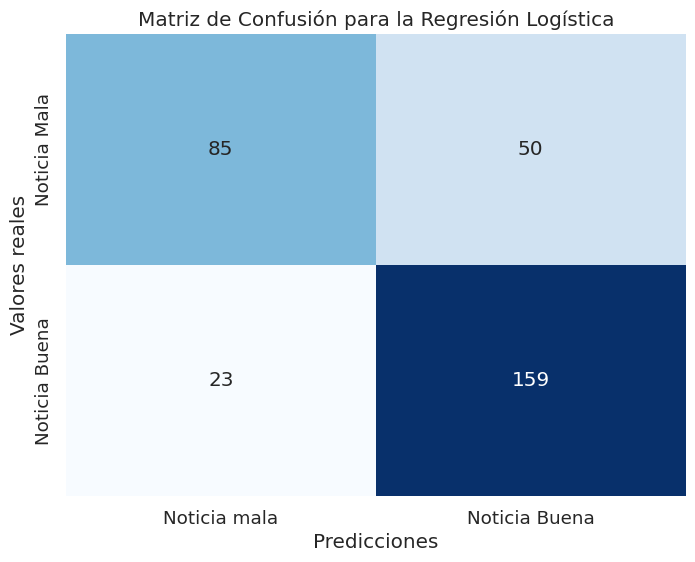

In [68]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo de Regresión Logística
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logistic_regression = logistic_regression_model.predict(X_test_tfidf)

# Calcular la matriz de confusión para la Regresión Logística
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Configurar el estilo de seaborn para mejorar la visualización
sns.set(font_scale=1.2)

# Configurar el tamaño de la figura para la visualización de la matriz de confusión
plt.figure(figsize=(8, 6))

# Graficar la matriz de confusión con Seaborn
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Noticia mala', 'Noticia Buena'],
            yticklabels=['Noticia Mala', 'Noticia Buena'])

# Configurar etiquetas y título del gráfico
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión para la Regresión Logística')

# Mostrar la matriz de confusión
plt.show()


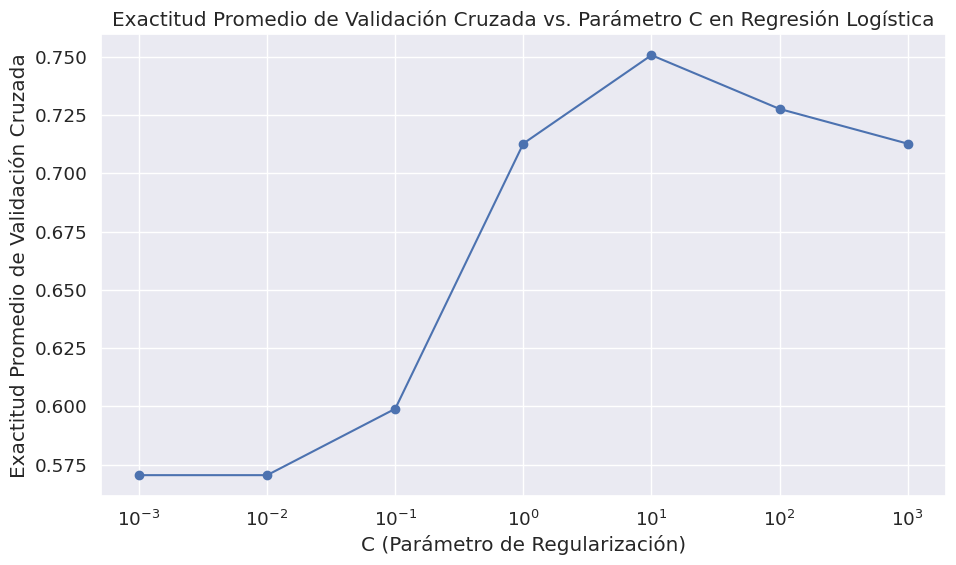

In [69]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar la curva de validación
def plot_validation_curve(param_range, train_scores_mean, test_scores_mean, param_name):
    plt.plot(param_range, train_scores_mean, marker='o', label='Entrenamiento', linestyle='-')
    plt.plot(param_range, test_scores_mean, marker='o', label='Validación', linestyle='-')
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)
    plt.title(f"Curva de Validación para Regresión Logística ({param_name})")
    plt.xlabel(param_name)
    plt.ylabel("Exactitud")
    plt.xscale('log')
    plt.legend()
    plt.grid(True)

# Parámetros de regularización (C)
param_range = np.logspace(-3, 3, 7)

# Curva de validación para seleccionar el hiperparámetro C
train_scores, test_scores = validation_curve(
    LogisticRegression(), X_train_tfidf, y_train, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Calcular medias y desviaciones estándar de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Configurar el tamaño de la figura para la visualización de la curva de validación
plt.figure(figsize=(24, 6))

# Subgráfico para la exactitud en función de C
plt.subplot(1, 2, 1)
plt.plot(param_range, test_scores_mean, marker='o', linestyle='-')
plt.title("Exactitud Promedio de Validación Cruzada vs. Parámetro C en Regresión Logística")
plt.xlabel("C (Parámetro de Regularización)")
plt.ylabel("Exactitud Promedio de Validación Cruzada")
plt.xscale('log')
plt.grid(True)



# **Métricas**

***MODELO KNN***

In [70]:
# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report

# Calcular y mostrar la exactitud y el informe de clasificación para el modelo RandomForest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.750788643533123

Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.61      0.68       135
           1       0.75      0.85      0.80       182

    accuracy                           0.75       317
   macro avg       0.75      0.73      0.74       317
weighted avg       0.75      0.75      0.75       317



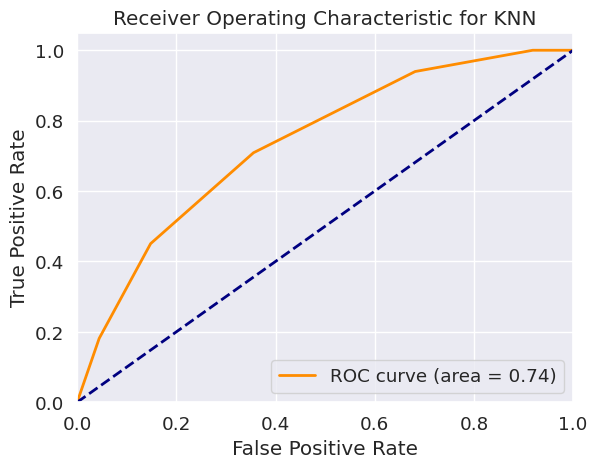

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de haber entrenado tu modelo KNN como se muestra en tu código

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo KNN
y_pred_mejor_knn = mejor_knn_model.predict_proba(X_test_tfidf)[:, 1]

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_mejor_knn)

# Calcular el Área Bajo la Curva (AUC) para el modelo KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC para el modelo KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()



***MODELO RANDOM FOREST***

In [72]:
# Importar las bibliotecas necesarias
from sklearn.metrics import accuracy_score, classification_report

# Imprimir la precisión del modelo Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Imprimir el informe de clasificación que incluye precision, recall, f1-score y support
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.750788643533123
              precision    recall  f1-score   support

          -1       0.75      0.61      0.68       135
           1       0.75      0.85      0.80       182

    accuracy                           0.75       317
   macro avg       0.75      0.73      0.74       317
weighted avg       0.75      0.75      0.75       317



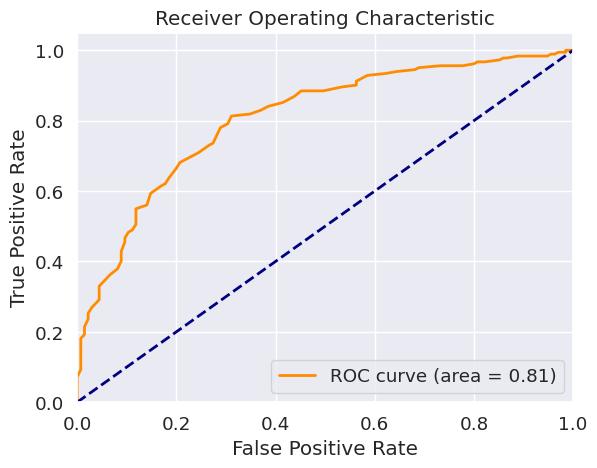

In [73]:
# Importar las bibliotecas necesarias
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba utilizando el modelo Random Forest (asegúrate de usar el modelo correcto)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()

# Plotear la curva ROC en color naranja oscuro con etiqueta y AUC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plotear la línea diagonal punteada que representa el rendimiento aleatorio del modelo
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configurar límites y etiquetas del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")  # Mostrar leyenda en la esquina inferior derecha
plt.show()



***MODELO SVM***

In [74]:
# Opcional: Evaluar el modelo SVM

# Importar las bibliotecas necesarias
from sklearn.metrics import accuracy_score, classification_report

# Imprimir la precisión del modelo SVM
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Imprimir el informe de clasificación que incluye precision, recall, f1-score y support
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7444794952681388
              precision    recall  f1-score   support

          -1       0.70      0.71      0.70       135
           1       0.78      0.77      0.78       182

    accuracy                           0.74       317
   macro avg       0.74      0.74      0.74       317
weighted avg       0.75      0.74      0.74       317



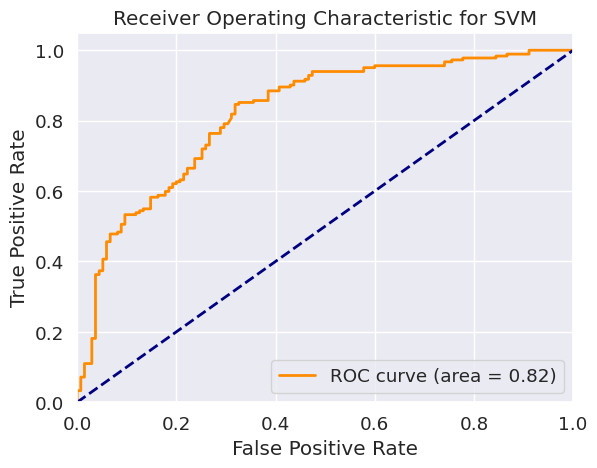

In [75]:
# Importar las bibliotecas necesarias
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Crear un modelo SVM con probabilidades habilitadas
svm_model = SVC(random_state=0, probability=True)  # Habilitar probabilidades

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo SVM
y_pred_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calcular el Área Bajo la Curva (AUC) para el modelo SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC para el modelo SVM
plt.figure()

# Plotear la curva ROC para el modelo SVM en color naranja oscuro con etiqueta y AUC
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)

# Plotear la línea diagonal punteada que representa el rendimiento aleatorio del modelo
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configurar límites y etiquetas del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")  # Mostrar leyenda en la esquina inferior derecha
plt.show()


***MODELO PROPUESTA REGRESIÓN LOGISTICA***

In [76]:
# Mostrar el informe de clasificación para la Regresión Logística
print("Informe de clasificación para la Regresión Logística:")
print(classification_report(y_test, y_pred_logistic_regression))


Informe de clasificación para la Regresión Logística:
              precision    recall  f1-score   support

          -1       0.79      0.63      0.70       135
           1       0.76      0.87      0.81       182

    accuracy                           0.77       317
   macro avg       0.77      0.75      0.76       317
weighted avg       0.77      0.77      0.76       317



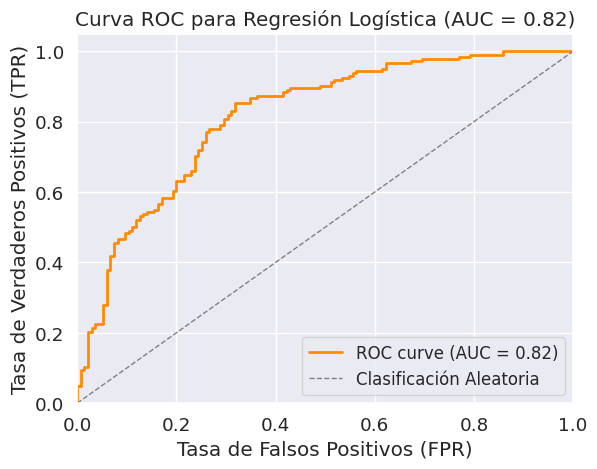

In [77]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Crear un modelo de Regresión Logística con probabilidades habilitadas
logreg_model = LogisticRegression(random_state=0)  # Habilitar probabilidades

# Entrenar el modelo de Regresión Logística con los datos de entrenamiento
logreg_model.fit(X_train_tfidf, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo de Regresión Logística
y_pred_prob_logreg = logreg_model.predict_proba(X_test_tfidf)[:, 1]  # Obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)

# Calcular el Área Bajo la Curva (AUC) para el modelo de Regresión Logística
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Graficar la curva ROC para el modelo de Regresión Logística
plt.figure()

# Plotear la curva ROC en color naranja oscuro con etiqueta y AUC
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_logreg)

# Plotear la línea diagonal punteada que representa el rendimiento aleatorio del modelo
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Clasificación Aleatoria')

# Configurar límites y etiquetas del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Regresión Logística (AUC = {:.2f})'.format(roc_auc_logreg))
plt.legend(loc='lower right', fontsize='small')
plt.show()


***COMPRACIÓN GRÁFICA***

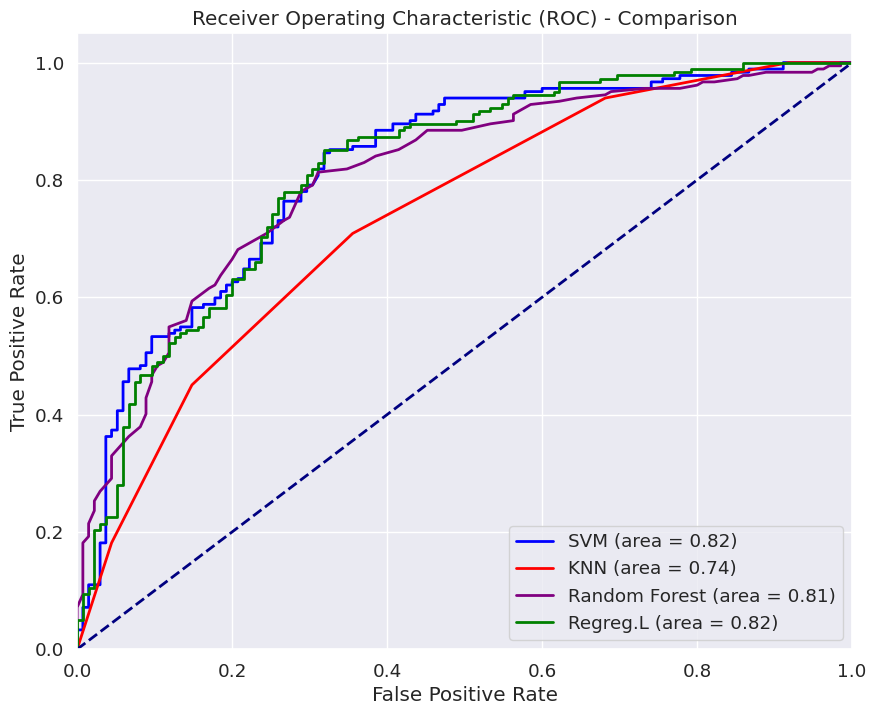

In [78]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asegúrate de haber calculado previamente y_pred_prob_svm, y_pred_prob_dt, y_pred_prob_knn, y_pred_prob_rf
# para los modelos SVM, Árbol de Decisión, KNN y Random Forest respectivamente

# Calcular curva ROC y AUC para cada modelo
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_mejor_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Graficar todas las curvas ROC en la misma figura
plt.figure(figsize=(10, 8))

# Plotear la curva ROC para el modelo SVM en azul con etiqueta y AUC
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, color='blue', lw=2)

# Plotear la curva ROC para el modelo KNN en rojo con etiqueta y AUC
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn, color='red', lw=2)

# Plotear la curva ROC para el modelo Random Forest en morado con etiqueta y AUC
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf, color='purple', lw=2)

# Plotear la curva ROC para el modelo de Regresión Logística en verde con etiqueta y AUC
plt.plot(fpr_logreg, tpr_logreg, label='Regreg.L (area = %0.2f)' % roc_auc_logreg, color='green', lw=2)

# Plotear la línea diagonal punteada que representa el rendimiento aleatorio del modelo
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configurar límites y etiquetas del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()


# **Criterios, recomendaciones y conclusiones**

***CRITERIOS***


Considerando que la evaluación de una empresa no se limita únicamente a reconocer sus puntos fuertes, sino que implica igualmente la identificación de debilidades y errores, se destaca la importancia de reconocer la habilidad de clasificar información adversa. Este enfoque facilita una comprensión más profunda de los sectores y áreas que requieren mejoras. En consecuencia, los criterios a considerar para la selección del modelo más adecuado son:



*   Porcentaje de precisión en clasificación de malas noticias
*   Porcentaje de precisión en clasificación de buenas noticias
*   Area de la curva ROC

El modelo con mayor desempeño en los tres criterios mencionados corresponde a la propuesta de Regresión logistica, donde los respectivos valores son:
*   Porcentaje de precisión en clasificación de malas noticias **(79%)**
*   Porcentaje de precisión en clasificación de buenas noticias **(76%)**
*   Area de la curva ROC **(82%)**







***RECOMENDACIONES***


Se sugiere la implementación del modelo de Regresión Logística con la incorporación de un régimen de mantenimiento y entrenamiento continuo con el propósito de asegurar su actualización constante. Este enfoque se orienta hacia la utilización de los resultados obtenidos con el objetivo de mejorar la calidad del servicio y fortalecer la capacidad de anticipación ante eventos adversos. La ejecución de un mantenimiento periódico y la actualización del modelo garantizan su relevancia en la toma de decisiones, permitiendo una adaptación eficaz a cambios en el entorno y proporcionando una mayor capacidad de respuesta frente a circunstancias negativas que puedan afectar el desempeño del sistema. Este enfoque proactivo se alinea con las mejores prácticas para maximizar la utilidad y la eficacia del modelo de Regresión Logística en un contexto empresarial.





***CONCLUSIONES***


Es imperativo llevar a cabo la implementación del modelo de Regresión Logística con un énfasis particular en el análisis de noticias con connotaciones negativas. Se recomienda dirigir la atención hacia la exploración detallada de las temáticas recurrentes en este conjunto de noticias negativas con el propósito de identificar de manera exhaustiva las problemáticas subyacentes. Este enfoque estratégico permitirá una comprensión más profunda de los elementos críticos y proporcionará una base analítica sólida para abordar y mitigar los desafíos asociados con este tipo de información.



# **Bibliografía**

* https://scikit-learn.org/stable/index.html
* https://www.ibm.com/mx-es/topics/knn
* https://python-charts.com/es/
* https://github.com/Japulgarin/Data_challenge_uninorte/blob/main/Sesi%C3%B3n_Pr%C3%A1ctica_NLP_(clasificacion_de_texto)%20(1).ipynb
* https://aws.amazon.com/es/what-is/logistic-regression/
* http://surl.li/njlkw
